<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding Outliers**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform exploratory data analysis or EDA. 
You will explore the distribution of key variables and focus on identifying outliers in this lab.


## Objectives


In this lab, you will perform the following:


-  Analyze the distribution of key variables in the dataset.

-  Identify and remove outliers using statistical methods.

-  Perform relevant statistical and correlation analysis.


#### Install and import the required libraries


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 151.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 200.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 167.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 175.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 94.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 180.8 MB/s eta 0:00:00


<h3>Step 1: Load and Explore the Dataset</h3>


Load the dataset into a DataFrame and examine the structure of the data.


In [2]:
file_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

#Create the dataframe
df = pd.read_csv(file_url)

#Display the top 10 records
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h3>Step 2: Plot the Distribution of Industry</h3>


Explore how respondents are distributed across different industries.

- Plot a bar chart to visualize the distribution of respondents by industry.

- Highlight any notable trends.


In [51]:
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9', 'JobSatPoints_10',
       'JobSatPoints_11', 'SurveyLength', 'SurveyEase', 'ConvertedCompYearly',
       'JobSat', 'AgeNumeric'],
      dtype='object', length=115)

In [52]:
df['MainBranch'].unique()

array(['I am a developer by profession', 'I am learning to code',
       'I code primarily as a hobby',
       'I am not primarily a developer, but I write code sometimes as part of my work/studies',
       'I used to be a developer by profession, but no longer am'],
      dtype=object)

In [53]:
if 'industry' in df.columns:
    print("La colonne 'industry' existe.")
else:
    print("La colonne 'industry' n'existe pas.")

La colonne 'industry' n'existe pas.


In [54]:
if 'sector' in df.columns:
    print("La colonne 'sector' existe.")
else:
    print("La colonne 'sector' n'existe pas.")

La colonne 'sector' n'existe pas.


In [55]:
columns_starting_with_indu = [col for col in df.columns if col.startswith('indu')]
print(columns_starting_with_indu)

[]


✅pas de colonne industry

<h3>Step 3: Identify High Compensation Outliers</h3>


Identify respondents with extremely high yearly compensation.

- Calculate basic statistics (mean, median, and standard deviation) for `ConvertedCompYearly`.

- Identify compensation values exceeding a defined threshold (e.g., 3 standard deviations above the mean).


In [3]:
Q1 = df['CompTotal'].quantile(0.25)
Q3 = df['CompTotal'].quantile(0.75)
IQR = Q3-Q1
higher_outlier_CompTot = Q3+(1.5*IQR)
higher_outlier_CompTot

np.float64(535000.0)

In [9]:
respondant_higher_comp_df = df[df['CompTotal'] > higher_outlier_CompTot]
respondant_higher_comp_df.shape

(5876, 114)

In [11]:
#stats des 5876 repondants qui ont un niveau de compsatation > higher oultier
respondant_higher_comp_df['CompTotal'].describe()

count     5.876000e+03
mean     1.701838e+146
std      1.304545e+148
min       5.360000e+05
25%       8.400000e+05
50%       1.500000e+06
75%       4.500000e+06
max      1.000000e+150
Name: CompTotal, dtype: float64

In [18]:
#identify respondants with compensation above >higher outlier
# Extraire les RespondId
respondant_ids = respondant_higher_comp_df['ResponseId']

# Vérifier le nombre d'identifiants
print(len(respondant_ids))

5876


In [6]:
#stats des repondants qui ont un salaire inferieur <= higher outlier
comp_total_filtered = df['CompTotal'][df['CompTotal'] <= higher_outlier_CompTot]
print(comp_total_filtered.describe())

count     27864.000000
mean     117182.605369
std       99970.300622
min           0.000000
25%       50000.000000
50%       88000.000000
75%      150000.000000
max      535000.000000
Name: CompTotal, dtype: float64


In [14]:
#compensation above mean + 3 std
threshold_compTotal = df['CompTotal'].mean() +(3* df['CompTotal'].std())
threshold_compTotal

np.float64(1.6361989816808042e+148)

In [19]:
high_compensation = df[df['CompTotal'] > threshold_compTotal]
high_compensation.shape

(1, 114)

In [23]:
# Extraire les colonnes spécifiques
comp_total = high_compensation['CompTotal'].iloc[0]
respond_id = high_compensation['ResponseId'].iloc[0]

# Afficher les valeurs
print(f"RespondId : {respond_id}")
print(f"CompTotal : {comp_total}")

RespondId : 14355
CompTotal : 1.0000000000000002e+150


In [ ]:
#boxplot
sns.boxplot(data=df['CompTotal']) 
plt.title('Box Plot Comp total') 
plt.show()

In [26]:
#creer une nouvelle df sans les outliers de CompTotal
comp_total_filtered_df = df[df['CompTotal'] <= higher_outlier_CompTot]

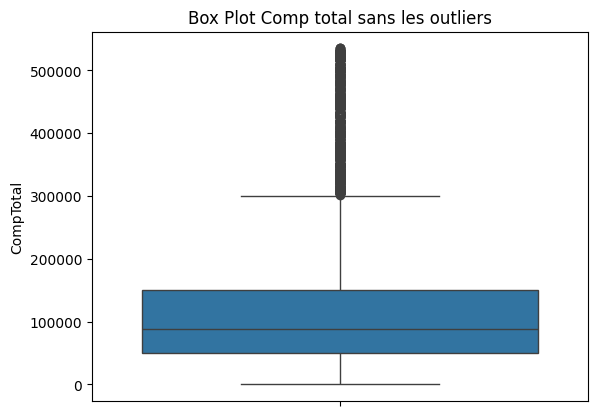

In [28]:
#boxplot sans outliers
sns.boxplot(data=comp_total_filtered_df['CompTotal']) 
plt.title('Box Plot Comp total sans les outliers') 
plt.show()

<h3>Step 4: Detect Outliers in Compensation</h3>


Identify outliers in the `ConvertedCompYearly` column using the IQR method.

- Calculate the Interquartile Range (IQR).

- Determine the upper and lower bounds for outliers.

- Count and visualize outliers using a box plot.


In [29]:
Q1 = df['ConvertedCompYearly'].quantile(0.25)
Q3 = df['ConvertedCompYearly'].quantile(0.75)
IQR = Q3-Q1
higher_outlier_Converted_comp = Q3+(1.5*IQR)
higher_outlier_Converted_comp

np.float64(220860.75)

In [31]:
respondant_higher_convertedcomp_df = df[df['ConvertedCompYearly'] > higher_outlier_Converted_comp]
respondant_higher_convertedcomp_df.shape

(978, 114)

<h3>Step 5: Remove Outliers and Create a New DataFrame</h3>


Remove outliers from the dataset.

- Create a new DataFrame excluding rows with outliers in `ConvertedCompYearly`.
- Validate the size of the new DataFrame.


In [32]:
#creer une nouvelle df sans les outliers de ConvertedCompYearly
converted_comp_WOO_df = df[df['ConvertedCompYearly'] <= higher_outlier_Converted_comp]

In [43]:
converted_comp_WOO_df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

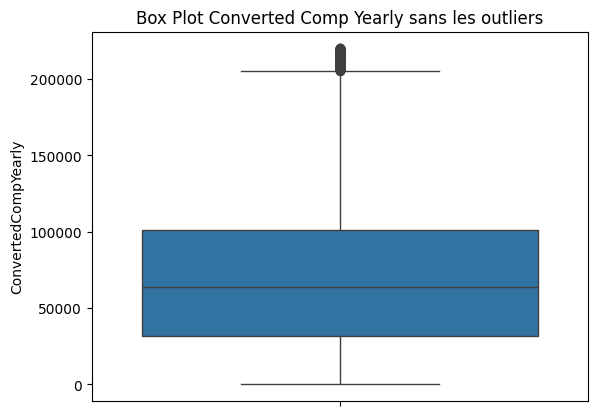

In [33]:
#boxplot sans outliers
sns.boxplot(data=converted_comp_WOO_df['ConvertedCompYearly']) 
plt.title('Box Plot Converted Comp Yearly sans les outliers') 
plt.show()

In [34]:
converted_comp_WOO_df.shape

(22457, 114)

<h3>Step 6: Correlation Analysis</h3>


Analyze the correlation between `Age` (transformed) and other numerical columns.

- Map the `Age` column to approximate numeric values.

- Compute correlations between `Age` and other numeric variables.

- Visualize the correlation matrix.


In [36]:
df['Age'].dtype

dtype('O')

In [37]:
df['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

In [38]:
# Dictionnaire de mappage
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 65,
    'Prefer not to say': None  # None pour les valeurs manquantes
}

# Appliquer le mappage à la colonne
df['AgeNumeric'] = df['Age'].map(age_mapping)

df['AgeNumeric'].unique()  

array([17., 40., 50., 20., 30., 60., nan, 65.])

In [39]:
df['AgeNumeric'].dtype

dtype('float64')

In [56]:
df['AgeNumeric'].describe()

count    65115.000000
mean        33.137618
std         11.398344
min         17.000000
25%         20.000000
50%         30.000000
75%         40.000000
max         65.000000
Name: AgeNumeric, dtype: float64

In [44]:
print(df['ResponseId'].dtype)
print(converted_comp_WOO_df['ResponseId'].dtype)

int64
int64


In [46]:
#joindre les deux df
merged_df = df.merge(converted_comp_WOO_df, on='ResponseId', how='inner')

In [48]:
print(merged_df.columns)

Index(['ResponseId', 'MainBranch_x', 'Age_x', 'Employment_x', 'RemoteWork_x',
       'Check_x', 'CodingActivities_x', 'EdLevel_x', 'LearnCode_x',
       'LearnCodeOnline_x',
       ...
       'JobSatPoints_6_y', 'JobSatPoints_7_y', 'JobSatPoints_8_y',
       'JobSatPoints_9_y', 'JobSatPoints_10_y', 'JobSatPoints_11_y',
       'SurveyLength_y', 'SurveyEase_y', 'ConvertedCompYearly_y', 'JobSat_y'],
      dtype='object', length=228)


In [49]:
x = merged_df['AgeNumeric']
y = merged_df['ConvertedCompYearly_y']

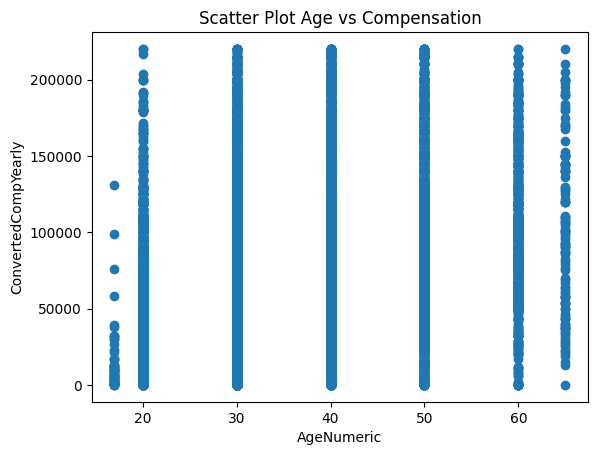

In [50]:
#scatter plot
plt.scatter(x, y)
plt.xlabel('AgeNumeric')
plt.ylabel('ConvertedCompYearly')
plt.title('Scatter Plot Age vs Compensation')
plt.show()

<h3> Summary </h3>


In this lab, you developed essential skills in **Exploratory Data Analysis (EDA)** with a focus on outlier detection and removal. Specifically, you:


- Loaded and explored the dataset to understand its structure.

- Analyzed the distribution of respondents across industries.

- Identified and removed high compensation outliers using statistical thresholds and the Interquartile Range (IQR) method.

- Performed correlation analysis, including transforming the `Age` column into numeric values for better analysis.


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-1|1.1|Madhusudan Moole|Reviewed and updated lab|                                                                                    
|2024-09-29|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
